#Language Detection Using Natural Language Processing (NLP)
###Team: 
*   Julkarnain
*   Muhammad Nashir Nasution

###Repository: [GitHub](https://github.com/julubis/language-detection)
###Application: [https://detectlang.herokuapp.com](https://detectlang.herokuapp.com/)


## Import libraries

In [11]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load dataset

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/julubis/language-detection/master/dataset.csv')

In [13]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [14]:
data.shape

(22000, 2)

##Counts of language

In [15]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

##Separating independent and dependent features

In [16]:
X = data["Text"]
y = data["language"]

##Label encoding

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

##Text preprocessing

In [18]:
cv = CountVectorizer(max_features=20000)

data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)
X = cv.fit_transform(data_list).toarray()
X.shape

(22000, 20000)

##Train test splitting

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

##Model training and prediction

In [20]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


##Model evaluation

In [21]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy is: {ac}")

Accuracy is: 0.9422727272727273


##Model evaluation graph

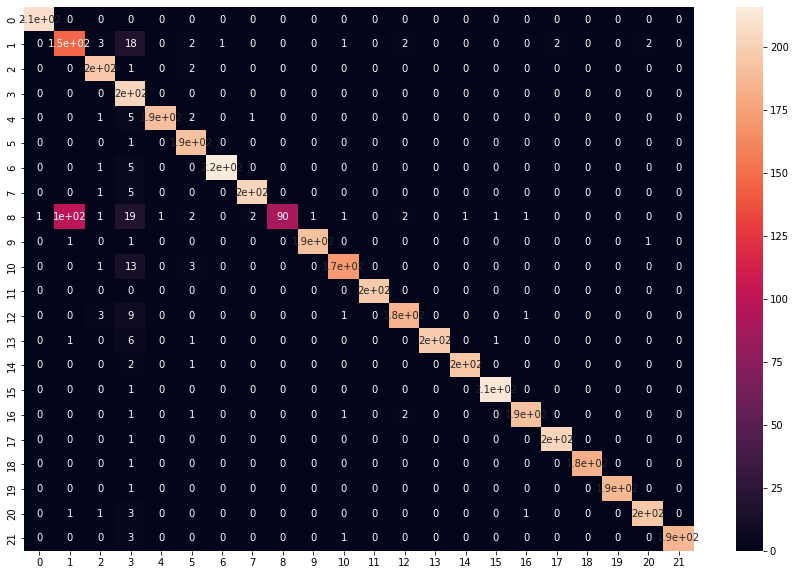

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.show()

##Save model

In [23]:
model_file = open('language_model.pk', 'wb')
pk = [cv, model, le]
pickle.dump(pk, model_file)
model_file.close()

##Load Model

In [24]:
model_file = open('language_model.pk', 'rb')
cv, model, le = pickle.load(model_file)
model_file.close()

##Testing

In [25]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(lang[0], "Language")

predict("Machine Learning is very good") #English Language
predict("Saya membaca buku di perpustakaan") #Indonesian Language

English Language
Indonesian Language
